In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
from tensorflow import keras
import numpy as np

In [3]:
df_treino_2017 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/descritivos/isic_2017_treino.csv')
df_treino_2018 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/descritivos/isic_2018_treino.csv')

## Tratando 2017

In [4]:
df_treino_2017.head()

,image_id,melanoma,seborrheic_keratosis
0,ISIC_0000000,0.0,0.0
1,ISIC_0000001,0.0,0.0
2,ISIC_0000002,1.0,0.0
3,ISIC_0000003,0.0,0.0
4,ISIC_0000004,1.0,0.0


In [5]:
df_treino_2017['nevus'] = ((df_treino_2017.melanoma == 0) & (df_treino_2017.seborrheic_keratosis == 0)).astype(float)
df_treino_2017.head()

,image_id,melanoma,seborrheic_keratosis,nevus
0,ISIC_0000000,0.0,0.0,1.0
1,ISIC_0000001,0.0,0.0,1.0
2,ISIC_0000002,1.0,0.0,0.0
3,ISIC_0000003,0.0,0.0,1.0
4,ISIC_0000004,1.0,0.0,0.0


In [6]:
df_treino_2017.shape

(2000, 4)

In [7]:
df_treino_2017 = df_treino_2017[(df_treino_2017.melanoma == 1) | (df_treino_2017.nevus == 1)]
df_treino_2017.shape

(1746, 4)

In [8]:
df_treino_2017.melanoma.value_counts()

0.0    1372
1.0     374
Name: melanoma, dtype: int64

## Tratando 2018

In [9]:
df_treino_2018.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_treino_2018.shape

(10015, 8)

In [11]:
df_treino_2018 = df_treino_2018[df_treino_2018.MEL == 1]
df_treino_2018.shape

(1113, 8)

## Juntar as duas bases

In [12]:
df_treino_2018 = df_treino_2018.loc[:, ['image', 'MEL', 'NV']]
df_treino_2018.head()

,image,MEL,NV
4,ISIC_0024310,1.0,0.0
7,ISIC_0024313,1.0,0.0
9,ISIC_0024315,1.0,0.0
17,ISIC_0024323,1.0,0.0
27,ISIC_0024333,1.0,0.0


In [13]:
df_treino_2018.columns = ['image', 'melanoma', 'nevus']
df_treino_2018.head()

,image,melanoma,nevus
4,ISIC_0024310,1.0,0.0
7,ISIC_0024313,1.0,0.0
9,ISIC_0024315,1.0,0.0
17,ISIC_0024323,1.0,0.0
27,ISIC_0024333,1.0,0.0


In [14]:
df_treino_2017 = df_treino_2017.loc[:, ['image_id', 'melanoma', 'nevus']]
df_treino_2017.head()

,image_id,melanoma,nevus
0,ISIC_0000000,0.0,1.0
1,ISIC_0000001,0.0,1.0
2,ISIC_0000002,1.0,0.0
3,ISIC_0000003,0.0,1.0
4,ISIC_0000004,1.0,0.0


In [15]:
df_treino_2017.columns = ['image', 'melanoma', 'nevus']
df_treino_2017.head()

,image,melanoma,nevus
0,ISIC_0000000,0.0,1.0
1,ISIC_0000001,0.0,1.0
2,ISIC_0000002,1.0,0.0
3,ISIC_0000003,0.0,1.0
4,ISIC_0000004,1.0,0.0


In [16]:
df_treino = pd.concat([df_treino_2017, df_treino_2018], axis = 0)
df_treino.head()

,image,melanoma,nevus
0,ISIC_0000000,0.0,1.0
1,ISIC_0000001,0.0,1.0
2,ISIC_0000002,1.0,0.0
3,ISIC_0000003,0.0,1.0
4,ISIC_0000004,1.0,0.0


In [17]:
df_treino.shape

(2859, 3)

In [18]:
df_treino.image.nunique()

2859

In [19]:
(df_treino.melanoma + df_treino.nevus).sum()

2859.0

In [20]:
(df_treino.melanoma + df_treino.nevus).all()

True

In [21]:
df_treino.head()

,image,melanoma,nevus
0,ISIC_0000000,0.0,1.0
1,ISIC_0000001,0.0,1.0
2,ISIC_0000002,1.0,0.0
3,ISIC_0000003,0.0,1.0
4,ISIC_0000004,1.0,0.0


In [22]:
df_treino = df_treino.drop('nevus', axis=1)

In [23]:
df_treino['image'] = df_treino['image'].apply(lambda x: x + '.jpg')

In [24]:
# melanoma = 1 cancer, melanoma = 0 sem cancer
df_treino

,image,melanoma
0,ISIC_0000000.jpg,0.0
1,ISIC_0000001.jpg,0.0
2,ISIC_0000002.jpg,1.0
3,ISIC_0000003.jpg,0.0
4,ISIC_0000004.jpg,1.0
...,...,...
9983,ISIC_0034289.jpg,1.0
9988,ISIC_0034294.jpg,1.0
10007,ISIC_0034313.jpg,1.0
10010,ISIC_0034316.jpg,1.0


## Verificando duas imagens

In [25]:
import cv2
import matplotlib.pyplot as plt

In [26]:
sample = cv2.imread("/content/gdrive/MyDrive/isic_treino/ISIC_0000000.jpg")

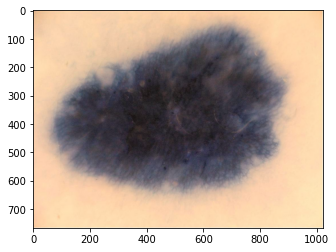

In [27]:
plt.imshow(sample)
plt.show()

In [28]:
sample.shape

(767, 1022, 3)

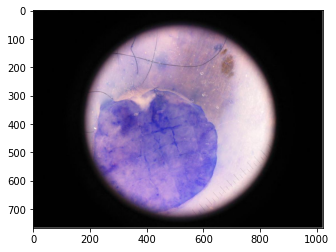

In [29]:
sample = cv2.imread("/content/gdrive/MyDrive/isic_treino/ISIC_0000004.jpg")
plt.imshow(sample)
plt.show()

## Tratando DataSet de Validação

In [30]:
df_validacao = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/descritivos/isic_2017_validacao.csv')

In [31]:
df_validacao['nevus'] = ((df_validacao.melanoma == 0) & (df_validacao.seborrheic_keratosis == 0)).astype(float)
df_validacao.head()

,image_id,melanoma,seborrheic_keratosis,nevus
0,ISIC_0001769,0.0,0.0,1.0
1,ISIC_0001852,0.0,0.0,1.0
2,ISIC_0001871,0.0,0.0,1.0
3,ISIC_0003462,0.0,0.0,1.0
4,ISIC_0003539,0.0,0.0,1.0


In [32]:
df_validacao = df_validacao[(df_validacao.melanoma == 1) | (df_validacao.nevus == 1)]
df_validacao.head()

,image_id,melanoma,seborrheic_keratosis,nevus
0,ISIC_0001769,0.0,0.0,1.0
1,ISIC_0001852,0.0,0.0,1.0
2,ISIC_0001871,0.0,0.0,1.0
3,ISIC_0003462,0.0,0.0,1.0
4,ISIC_0003539,0.0,0.0,1.0


In [33]:
df_validacao = df_validacao[(df_validacao.melanoma == 1) | (df_validacao.nevus == 1)]

In [34]:
df_validacao.sum()

image_id                ISIC_0001769ISIC_0001852ISIC_0001871ISIC_00034...
melanoma                                                               30
seborrheic_keratosis                                                    0
nevus                                                                  78
dtype: object

In [35]:
df_validacao = df_validacao.drop(['nevus', 'seborrheic_keratosis'], axis=1)

In [36]:
df_validacao.columns = ['image', 'melanoma']

In [37]:
df_validacao['image'] = df_validacao['image'].apply(lambda x: x + '.jpg')
df_validacao

,image,melanoma
0,ISIC_0001769.jpg,0.0
1,ISIC_0001852.jpg,0.0
2,ISIC_0001871.jpg,0.0
3,ISIC_0003462.jpg,0.0
4,ISIC_0003539.jpg,0.0
...,...,...
145,ISIC_0015443.jpg,0.0
146,ISIC_0015445.jpg,0.0
147,ISIC_0015483.jpg,0.0
148,ISIC_0015496.jpg,0.0


## Criando o Gerador

In [38]:
train_aug = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=180, #180
    zoom_range=0.3,
    height_shift_range=0.3,
    width_shift_range=0.30,
    shear_range=0.3,
    channel_shift_range= 0.0,
    brightness_range= None,
    fill_mode= 'constant', 
)

train_generator = train_aug.flow_from_dataframe(
    dataframe=df_treino,
    directory="/content/gdrive/MyDrive/isic_treino",
    x_col="image",
    y_col="melanoma",
    class_mode='raw',
    target_size=(224,224),
    #color_mode= "grayscale",
    batch_size=32)

Found 2859 validated image filenames.


### Gerador validação

In [39]:
validacao_aug = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
   
)

validacao_generator = validacao_aug.flow_from_dataframe(
  dataframe=df_validacao,
    directory="/content/gdrive/MyDrive/isic_2017_validacao/isic_2017_validacao",
    x_col="image",
    y_col="melanoma",
    class_mode='raw',
    target_size=(224,224),
    #color_mode= "grayscale",
    batch_size=32)

Found 108 validated image filenames.


## Realizando o Transfer Learning

In [40]:
base_model = keras.applications.VGG16(weights="imagenet", include_top=False) # ResNet - VGG16-19

58892288/58889256 [==============================] - 1s 0us/step


In [41]:
# Transfer Learning
base_model.trainable = False
input1 = keras.layers.Input(shape=((224,224,3)))
x1 = base_model(input1, training=False)
x1 = keras.layers.Flatten()(x1)
x1 = keras.layers.Dropout(0.2)(x1)
x1 = keras.layers.Dense(128, activation='relu')(x1)
x1 = keras.layers.Dropout(0.3)(x1)
x1 = keras.layers.Dense(64, activation='relu')(x1)
x1 = keras.layers.Dense(32, activation='relu')(x1)
x1 = keras.layers.Dense(16, activation='relu')(x1)


outputs = keras.layers.Dense(1, activation='sigmoid')(x1)

model = keras.models.Model(inputs=input1, outputs=outputs)

In [42]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256  

In [43]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

In [44]:
callbacks= [
            keras.callbacks.ModelCheckpoint('/content/gdrive/MyDrive/Colab Notebooks/model.h5', verbose=1, monitor='val_loss', save_best_only=True),
            keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
            keras.callbacks.TensorBoard(log_dir='logs')    
]

model.fit(x=train_generator,
          epochs=50,
          steps_per_epoch=len(train_generator),
          callbacks=callbacks,
          validation_data=validacao_generator)

Epoch 1/50
90/90 [==============================] - 2362s 26s/step - loss: 0.7151 - accuracy: 0.5834 - val_loss: 0.6991 - val_accuracy: 0.6389

Epoch 00001: val_loss improved from inf to 0.69907, saving model to /content/gdrive/MyDrive/Colab Notebooks/model.h5
Epoch 2/50
90/90 [==============================] - 251s 3s/step - loss: 0.6305 - accuracy: 0.6534 - val_loss: 0.5890 - val_accuracy: 0.6759

Epoch 00002: val_loss improved from 0.69907 to 0.58903, saving model to /content/gdrive/MyDrive/Colab Notebooks/model.h5
Epoch 3/50
90/90 [==============================] - 251s 3s/step - loss: 0.6095 - accuracy: 0.6747 - val_loss: 0.6162 - val_accuracy: 0.6759

Epoch 00003: val_loss did not improve from 0.58903
Epoch 4/50
90/90 [==============================] - 250s 3s/step - loss: 0.5856 - accuracy: 0.6898 - val_loss: 0.6081 - val_accuracy: 0.6759

Epoch 00004: val_loss did not improve from 0.58903
Epoch 5/50
90/90 [==============================] - 251s 3s/step - loss: 0.5827 - accuracy

## Realizando o Fine Tuning

In [45]:
base_model.trainable = True
opt = keras.optimizers.Adam(learning_rate=1e-5)
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=opt)

In [46]:
callbacks= [
            keras.callbacks.ModelCheckpoint('/content/gdrive/MyDrive/Colab Notebooks/model.h5', verbose=1, monitor='val_loss', save_best_only=True),
            keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
            keras.callbacks.TensorBoard(log_dir='logs')    
]

model.fit(x=train_generator,
          epochs=50,
          steps_per_epoch=len(train_generator),
          callbacks=callbacks,
          validation_data=validacao_generator)

Epoch 1/50
90/90 [==============================] - 276s 3s/step - loss: 0.4781 - accuracy: 0.7726 - val_loss: 0.5998 - val_accuracy: 0.7130

Epoch 00001: val_loss improved from inf to 0.59978, saving model to /content/gdrive/MyDrive/Colab Notebooks/model.h5
Epoch 2/50
90/90 [==============================] - 261s 3s/step - loss: 0.4483 - accuracy: 0.7936 - val_loss: 0.5509 - val_accuracy: 0.7593

Epoch 00002: val_loss improved from 0.59978 to 0.55088, saving model to /content/gdrive/MyDrive/Colab Notebooks/model.h5
Epoch 3/50
90/90 [==============================] - 263s 3s/step - loss: 0.4236 - accuracy: 0.8038 - val_loss: 0.6267 - val_accuracy: 0.7222

Epoch 00003: val_loss did not improve from 0.55088
Epoch 4/50
90/90 [==============================] - 260s 3s/step - loss: 0.4041 - accuracy: 0.8230 - val_loss: 0.5810 - val_accuracy: 0.7315

Epoch 00004: val_loss did not improve from 0.55088
Epoch 5/50
90/90 [==============================] - 258s 3s/step - loss: 0.3929 - accuracy: 

## Verificando resultado no conjunto de Teste

In [47]:
df_teste = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/descritivos/isic_2017_teste.csv')

In [48]:
df_teste.columns = ['image']

In [49]:
df_teste['image'] = df_teste['image'].apply(lambda x: x + '.jpg')

In [50]:
df_teste

,image
0,ISIC_0012086.jpg
1,ISIC_0012092.jpg
2,ISIC_0012095.jpg
3,ISIC_0012134.jpg
4,ISIC_0012136.jpg
...,...
595,ISIC_0016068.jpg
596,ISIC_0016069.jpg
597,ISIC_0016070.jpg
598,ISIC_0016071.jpg


In [51]:
test_aug = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=180, #180
    zoom_range=0.3,
    height_shift_range=0.3,
    width_shift_range=0.30,
    shear_range=0.3,
    channel_shift_range= 0.0,
    brightness_range= None,
    fill_mode= 'constant',  
)

test_generator = test_aug.flow_from_dataframe(
    dataframe=df_teste,
    directory="/content/gdrive/MyDrive/Colab Notebooks/isic_2017_teste/isic_2017_teste",
    x_col="image",
    y_col=None,
    class_mode=None,
    target_size=(224,224),
    batch_size=32)

Found 600 validated image filenames.


In [52]:
model.predict(test_generator)

array([[0.19510475],
       [0.04390364],
       [0.7024163 ],
       [0.45410398],
       [0.17854479],
       [0.3734084 ],
       [0.27413347],
       [0.04962277],
       [0.24538282],
       [0.45927352],
       [0.13316223],
       [0.03912805],
       [0.47539094],
       [0.12219646],
       [0.6012198 ],
       [0.26489967],
       [0.11596248],
       [0.18883425],
       [0.57907075],
       [0.22376761],
       [0.90595347],
       [0.28235778],
       [0.28294444],
       [0.35771284],
       [0.5965064 ],
       [0.26262608],
       [0.5646708 ],
       [0.30896914],
       [0.49701175],
       [0.9893049 ],
       [0.33771172],
       [0.31328994],
       [0.20194115],
       [0.39369237],
       [0.27440768],
       [0.24483156],
       [0.60172766],
       [0.62390345],
       [0.07301105],
       [0.757492  ],
       [0.06994438],
       [0.30754557],
       [0.72516197],
       [0.43673924],
       [0.19976746],
       [0.44788608],
       [0.06110205],
       [0.211

In [54]:
probabilidade = model.predict(test_generator)

In [57]:
df_resultado = df_teste

In [63]:
df_resultado['Probabilidade'] = probabilidade

In [64]:
df_resultado

,image,Probabilidade
0,ISIC_0012086.jpg,0.405311
1,ISIC_0012092.jpg,0.137792
2,ISIC_0012095.jpg,0.170495
3,ISIC_0012134.jpg,0.947797
4,ISIC_0012136.jpg,0.201789
...,...,...
595,ISIC_0016068.jpg,0.031876
596,ISIC_0016069.jpg,0.167558
597,ISIC_0016070.jpg,0.167777
598,ISIC_0016071.jpg,0.089838


In [65]:
df_resultado.to_csv('/content/gdrive/MyDrive/Colab Notebooks/resultado_test.csv', index = False)